In [1]:
%%time 
%reload_ext autoreload
%autoreload 2
from utils.tranformer import *
from utils.helpers import *
from utils.imports import *

# load val_data by crawling the list of wiki pages in "dataset/val_wiki.json"
val_data, val_urls = load_val_data(num_pages=10)
train_data, num_chars = crawl_wiki_data(new_links, visited_urls, num_chars, add=25e5, printer=True)

# instantiate model
model = BigramLanguageModel(vocab_size)
model = nn.DataParallel(model)
model = model.to(device) # move model parameters to gpu if available

CUDA_VISIBLE_DEVICES = 0,1,2,3,4,5,6,7
device: cuda
crawl_wiki_data: add=2.50M characters... page_length:128.3K, len(new_links):1605, len(visited_urls):11, num_chars:128.32K  https://www.wikipedia.org/wiki/David_Bowie                                                                      
page_length: 65.8K, len(new_links):2856, len(visited_urls):12, num_chars:194.10K  https://www.wikipedia.org/wiki/Dua_Lipa                                                                      
page_length:116.8K, len(new_links):4431, len(visited_urls):13, num_chars:310.92K  https://www.wikipedia.org/wiki/Gay_rights                                                                      
page_length: 15.4K, len(new_links):4519, len(visited_urls):14, num_chars:326.34K  https://www.wikipedia.org/wiki/Laura_Marling                                                                      
page_length: 14.4K, len(new_links):4606, len(visited_urls):15, num_chars:340.69K  https://www.wikipedia.org/wiki/World_Justice_Pr

page_length:  7.2K, len(new_links):15774, len(visited_urls):51, num_chars:1.37M  https://www.wikipedia.org/wiki/Regions_of_Slovakia                                                                      
page_length: 22.0K, len(new_links):15875, len(visited_urls):52, num_chars:1.39M  https://www.wikipedia.org/wiki/All_the_Young_Dudes                                                                      
page_length: 63.0K, len(new_links):16535, len(visited_urls):53, num_chars:1.46M  https://www.wikipedia.org/wiki/Annie_Lennox                                                                      
page_length:  7.4K, len(new_links):16540, len(visited_urls):54, num_chars:1.46M  https://www.wikipedia.org/wiki/Eat_Frozen_Pork                                                                      
page_length: 99.3K, len(new_links):17448, len(visited_urls):55, num_chars:1.56M  https://www.wikipedia.org/wiki/Switzerland                                                                      
page_leng

page_length: 12.4K, len(new_links):24791, len(visited_urls):92, num_chars:2.38M  https://www.wikipedia.org/wiki/Daniel_(Montenegrin_singer)                                                                      
page_length: 21.3K, len(new_links):25184, len(visited_urls):93, num_chars:2.41M  https://www.wikipedia.org/wiki/Hyperpop                                                                      
page_length: 25.6K, len(new_links):25559, len(visited_urls):94, num_chars:2.43M  https://www.wikipedia.org/wiki/Port_of_London                                                                      
page_length:  2.6K, len(new_links):25682, len(visited_urls):95, num_chars:2.43M  https://www.wikipedia.org/wiki/LGBT_history_in_the_Czech_Republic                                                                      
page_length: 11.9K, len(new_links):25963, len(visited_urls):96, num_chars:2.45M  https://www.wikipedia.org/wiki/Emirate                                                                  

In [2]:
%%time
step = 0

# Create a pytorch optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)  # usually 3e-4 for bigger networks.

list_epochs, list_losses, list_epochs_eval, list_losses_eval = [0], [], [0], [] 

xb, yb, pivot = get_batch(train_data, batch_size, pivot=0)

logits, loss = model(xb, yb)
if device.startswith('cuda') and torch.cuda.device_count() > 1:
    loss = np.mean(loss.tolist())
list_losses.append(loss.tolist())
losses = estimate_loss(model, train_data, val_data, eval_iters, 0, time.time())


list_losses_eval.append([item.detach().numpy().tolist() for item in (losses['train'], losses['val'])])

print(f'logits.shape (block_size * batch_size) = {logits.shape}')
print(f'loss: {loss:.3f}')
generate_text(model, step);


/data/home/osafak/.conda/envs/pt_env/lib/python3.8/site-packages/torch/nn/parallel/_functions.py:64: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


step 0:    train_loss:4.8336, val_loss:4.8382  (...Runtime: 0 min 59 sec)
logits.shape (block_size * batch_size) = torch.Size([32768, 97])
loss: 4.844
   ==> Text Generation: AD&?Ep7b45k~QZhzXO]702xi5+s)/6h"E"6ijXjLvXM!uB<3V*@/Q
A(_cD*lE-9K,fC#$)s$+^Ng'%B'^uSs:-z,dVF|Qf~|90JI[kOs!TE&@+2(R->!%{3"@DV~j!eF~T~_jsrNfWsb{:eW>K*!{$GbOj_*aj6$Cm"Zk_
"xR2spPM2u3dk0SBxf<`~NvTTw%f*j6fC?pC)(V5cU:T+g)1Is^)b<HIMe{IWn(cef HBv+vi<_+4sJ :v{J8dD-U0yuyd?3Ep(d[2e=Xp,[TiW^\O*cuUpe/
UdcXXB]TB(YZ6&FXhE Y:q:OB{hXMV_@U*up&GQe"!d}m"pUp]PV*0Z:DW?H`jeL\&[XG{8U4-,zE{cpn+l{^~?GApe[_11?uBlU`CMpN!M21L\
CPU times: user 2min 37s, sys: 26.5 s, total: 3min 3s
Wall time: 2min


step 1125: train_loss:2.2482, val_loss:2.2744  (...Runtime: 1 min 15 sec)


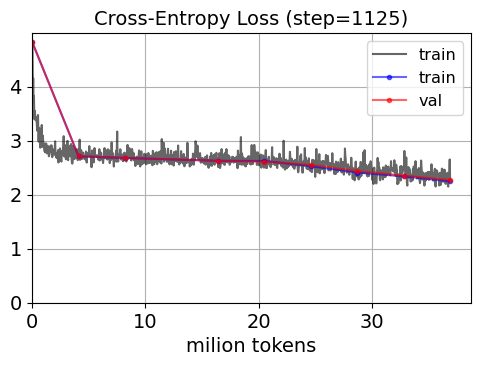

  ===>  Text Generation: AIDMI ontionC1
PA
C
CALA DFD
G
D
B-
O
Mactatrese
C-FCCCT
A sye
SSa
ScC-
ATCan-S
R
C
IDCh
CMSA-CJXAM05
Q2
SD
17X-386-H{111
19820
CWA-F
CG
MOM-PM
C-GA
4
6
SD18DISBI-xhurt
7
AF-95
H 25
B0-A
BCH
14
7
PIDC
1CAC
KB
20-1
2
M
K
AL
JPKD
L:
A(4)
ISAORD
A
SCC
G
H
SWG
TWD-2leO
R*
S
C8
GB
RI
TLY
NC
IsHACNCR+IS19W A
"IS
TA
PeGM
JON
UNMS
MUS
VO
HU
KF
UW-HA
DG
UA
CVOF
9
1
JT
OLA
ICF
SB
Bev
B
H
HH
ToCT
FTGO35
UA
L 
Runtime: 1 min 30 sec
------------------------------------------------------------------------------------------
 ==> Not enough tokens left in train_data. procured_batches = 48
crawl_wiki_data: add=2.50M characters... 14982 new pages crawled (...Runtime: 1 min 55 sec)
 ==> Not enough tokens left in train_data. procured_batches = 111
crawl_wiki_data: add=2.50M characters... 18165 new pages crawled (...Runtime: 1 min 50 sec)
step 1250: train_loss:2.2291, val_loss:2.2202  (...Runtime: 6 min 58 sec)


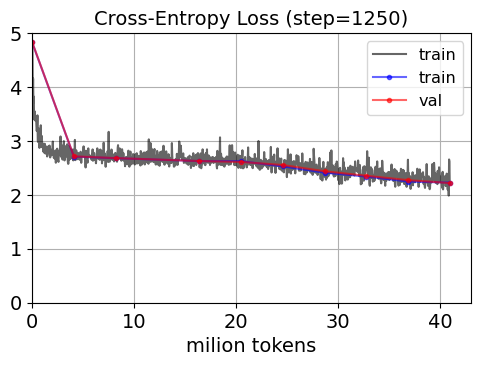

  ===>  Text Generation: Aver 182.10902822413.623719. Emag.35.802.
^ "Cattasoladewa"Mastaky ollion tot des34,504'005K"^ Ildh3/4.1340.61.90.1.34I.^ ay" 73.-846.671d:56.57.2;58:B3903353-98:52770: b."S. "Bosknd". 2.90.717:414ked230%.8Ret.gN:4248719-479trMasots(.9-3205-73042.37.4 206fatbor bolok Srinkedls 32.4.191.
^ ad Wol.84.
^ BghrJ Renitw13
Dujosord 2835.
A B.2261dk 4. 1with Invewed  Juarrin.
^ "020208, Fregieve 38 as 58 (
Runtime: 7 min 15 sec
------------------------------------------------------------------------------------------
 ==> Not enough tokens left in train_data. procured_batches = 93
crawl_wiki_data: add=2.50M characters... 12130 new pages crawled (...Runtime: 1 min 56 sec)
step 1375: train_loss:2.0860, val_loss:2.1337  (...Runtime: 10 min 53 sec)


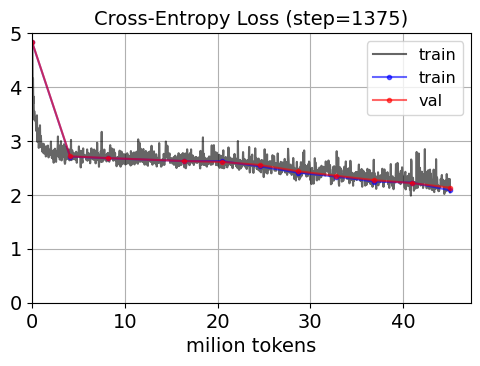

  ===>  Text Generation: Arty Bol, belcatemed forzents, vantil and alside ther;uch capeusing of Colicaber in Badiphuy Cona
Cart of Listory of Z) Poration, Sponalim, Vommilg Maran Charea, Suth roffermating on apem whooh the progiony Lepes Ganty", Vild".: VacIL Hustrumbuler whicled likm, sppoolo d5 40 land-1, a Schasetorn deatarn RestNeille seates.
Boundi,
Alicger Maltin Lace; broes eobler and the prited lapthes for down bee
Runtime: 11 min  7 sec
------------------------------------------------------------------------------------------
 ==> Not enough tokens left in train_data. procured_batches = 90
crawl_wiki_data: add=2.50M characters... 13528 new pages crawled (...Runtime: 1 min 54 sec)
 ==> Not enough tokens left in train_data. procured_batches = 8
crawl_wiki_data: add=2.50M characters... 15549 new pages crawled (...Runtime: 2 min  1 sec)
step 1500: train_loss:2.0818, val_loss:2.0844  (...Runtime: 16 min 40 sec)


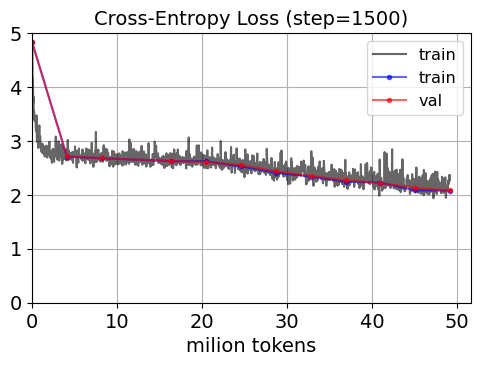

  ===>  Text Generation: AmnicuariativeFixation Nostatic Reivent
11ges: Herth
Unived Statist
1 Proupsheralesson (sup con Wectraphire Provinipgue): Mimitith Aprican folmect fregationa REcroctatee unto 201/28365: Consinention sande GradCatorribum sectrod stons 50
[520151, (retemberent of the steenthP's of was antitsm[at]
Oder penved of the subtedent nubation's eledifictaboran of thease luberging leths) (Authed they Fand)) in
Runtime: 16 min 53 sec
------------------------------------------------------------------------------------------
 ==> Not enough tokens left in train_data. procured_batches = 101
crawl_wiki_data: add=2.50M characters... 17267 new pages crawled (...Runtime: 2 min  5 sec)
 ==> Not enough tokens left in train_data. procured_batches = 14
crawl_wiki_data: add=2.50M characters... 12947 new pages crawled (...Runtime: 1 min 46 sec)
step 1625: train_loss:2.0407, val_loss:2.0484  (...Runtime: 22 min 22 sec)


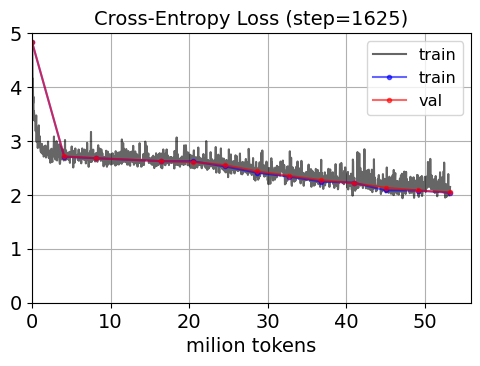

  ===>  Text Generation: Aga Arase der be The Farteerent, 3 Gondyist decor and 191MN Lucbole, the as ex twhe suther Crnianget Chastian Chrannem
Ghol Cin and the Avib Satth of Kilfalitica, 300y the Ruritia dege be Rashanteds, Geaw horgh proplient yittimt of the Nvorldational other Astrics. The Bown weith of Nenglenss of Serth tin Minovalle Shath[edit] tOb18to, 19674662 Sarlicang Cinitives which carety ge thale Sahrangudera,
Runtime: 22 min 38 sec
------------------------------------------------------------------------------------------
 ==> Not enough tokens left in train_data. procured_batches = 76
crawl_wiki_data: add=2.50M characters... 

In [ ]:
# train loop
start = time.time()

while step < max_iters:
    step += 1
    epoch = step * batch_size * block_size  # epoch is num of tokens ingested.
    sample_no = step * batch_size 

    # sample a batch of data
    xb, yb, pivot = get_batch(train_data, batch_size, pivot)

    while len(xb) < batch_size:
        repo_xb, repo_yb, pivot = xb, yb, 0
        train_data, num_chars = crawl_wiki_data(new_links, visited_urls, num_chars, add, printer=False)
        xb, yb, pivot = get_batch(train_data, batch_size-len(xb), pivot)
        xb = torch.cat((repo_xb, xb))
        yb = torch.cat((repo_yb, yb))

    # evaluate the loss
    logits, loss = model(xb, yb)
    if device.startswith('cuda') and torch.cuda.device_count() > 1:
        loss = loss.mean()
    optimizer.zero_grad(set_to_none=True)
    loss.backward() # get the gradients
    optimizer.step() # update parameters using the gradients

    list_losses.append(loss.item())
    list_epochs.append(epoch)

    # evaluate at fixed intervals
    if sample_no % eval_interval == 0 or step == max_iters:
        losses = estimate_loss(model, train_data, val_data, eval_iters, step, start)
        list_epochs_eval.append(epoch)
        list_losses_eval.append([item.detach().numpy().tolist() for item in (losses['train'], losses['val'])])
        plotter(list_epochs, list_losses, list_epochs_eval, list_losses_eval, step)
        generate_text(model, step)
        print_runtime(start)
        print('---' *30)

    if step // 10 == 0: 
        print(f'step:{step:3d}  {print_runtime(start, False)}')


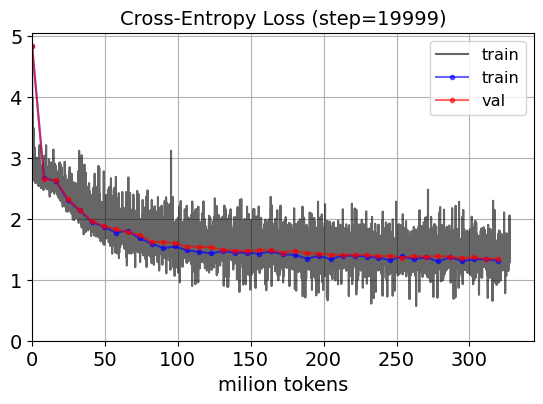

In [35]:
plotter(list_epochs, list_losses, list_epochs_eval, list_losses_eval, step)


# todo 
- check if `batch_size` designates number of batches per each GPU or the total batches of 8 GPUs.
- ~`get_batches` should get partial batches if it runs out of sentences~
- `get_batches` should process one wiki page at a time. 
- Use `tiktoken` tokenizer


# The Mathematical Trick in Self-Attention

- Attention is a **communication mechanism**. It's anodes in a graph looking at each other and aggregating informtaion with a weighted sum from all nodes pointing to them  

- No notion of space. Attention itself only acts over nodes and vectors.

- Separate batches don't talk to each other. Each example across batch dimension is processed independently. 

- **Encoder:**  No masking with `tril` allowing all tokens to communicate. **Decoder** uses masking in an autoregressive settings so past tokens don't talk to future tokens --otherwise they would give away the answer.

- **Self-Attention:** keys, queries and values arecome from the same source. 
- **Cross-Attention:** queries are produced from x, keys and values are produced from a previous encoder module. Encoder encodes some context we want the decoder's generation process to be conditioned on.
- **Scaling by sqrt(d):** It's an important normalization to have. 


----
## 1. Experiments

## 2. Experiments
---

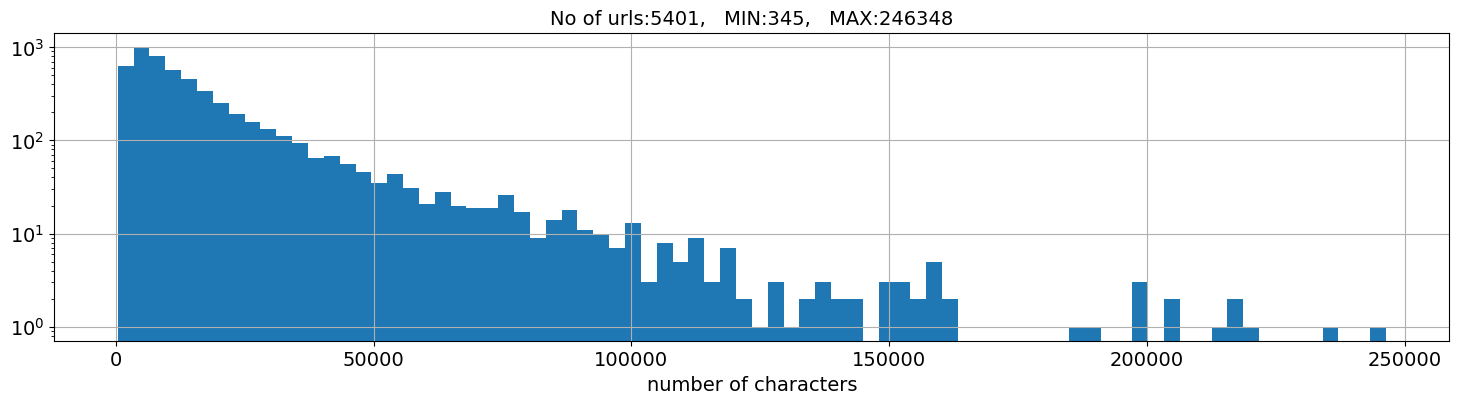

In [2]:
dirname='dataset/repo_wiki/'
fnames = sorted(glob.glob(f'{dirname}/*pkl'))
wikis = dict()
for fname in fnames:
    with open(fname, 'rb') as f:
        wikis.update(pickle.load(f)) 

urls = list(wikis.keys())
out = [(len(wikis[url])) for url in (urls)]
x, y, patches  = plt.hist(out, bins=80, log=True); plt.xlabel('number of characters'); 
plt.title(f'No of urls:{len(urls)},   MIN:{min(out)},   MAX:{max(out)}');


/data/home/osafak/.conda/envs/pt_env/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/data/home/osafak/.conda/envs/pt_env/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


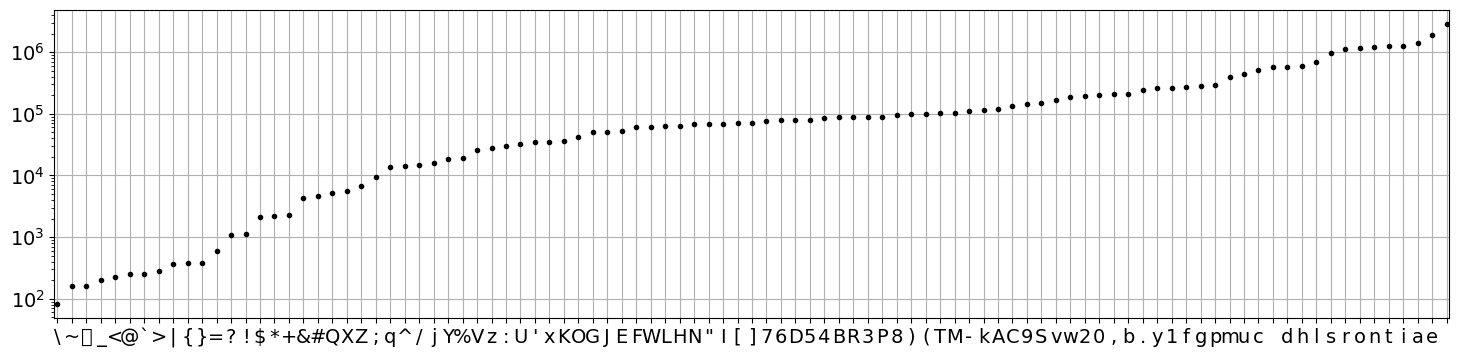

In [3]:
cnt = plot_character_frequency(urls[:1000], wikis)